# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
activation_funcs = {
    "identity": lambda x: x,
    "binstep": lambda x: np.where(x >= 0, 1, 0),
    "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
    "tanh": lambda x: np.tanh(x),
    "arctan": lambda x: np.arctan(x),
    "relu": lambda x: np.where(x >= 0, x, 0)
}

def neuron_output(X, w, b, activ):
    z = np.dot(X, w) + b
    return activ(z)

In [157]:
SIZE = 200
#SEED = 117

In [158]:
#np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)


# w = np.random.randn(2)
# b = 0.0

# outputs = neuron_output(X, w, b)

# y_pred = (outputs > 0.5).astype(int)


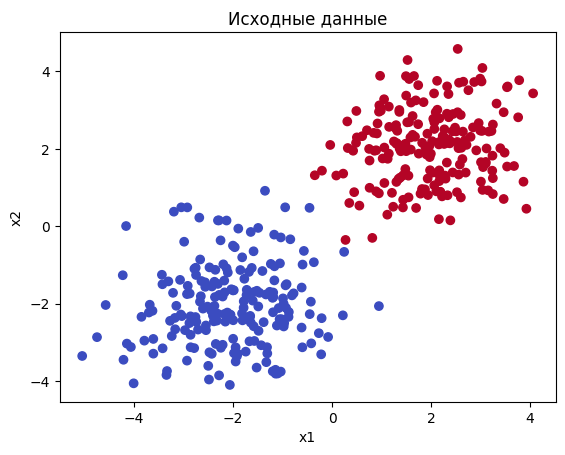

In [159]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [160]:
def fit(X, w, b, learnrate, epochamount, func):
    metrics = []

    for epoch in range(epochamount):
        for i in range(len(X)):
            y_pred = neuron_output(X[i], w, b, activation_funcs[func])
            y_pred = (y_pred > 0.5).astype(int)
            error = y[i] - y_pred
            w += learnrate * error * X[i]
            b += learnrate * error

        y_pred = neuron_output(X, w, b, activation_funcs[func])
        y_pred = (y_pred > 0.5).astype(int)
        acc = (y_pred == y).mean()
        metrics.append(acc)

        print(f"Эпоха {epoch + 1}/{epochamount} — точность: {acc:.4f}")

    return w, b, metrics


def plot_info(w, b, func, metrics, epochamount):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, activation_funcs[func])

    Z = (Z > 0.5).astype(int)
    # так-то мы решаем задачу классификации и нейрон должен выдавать бинарные данные
    # а фукции активации спавнят непрерывщину, потому навешиваю доп обработку
    
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f'Граница решений однослойного перцептрона при {func})')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.subplot(1, 2, 2)
    plt.plot(range(epochamount), metrics, marker='o')
    plt.title(f'Accuracy при {func}')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')

    plt.show()

Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9975
Эпоха 4/10 — точность: 0.9975
Эпоха 5/10 — точность: 0.9975
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


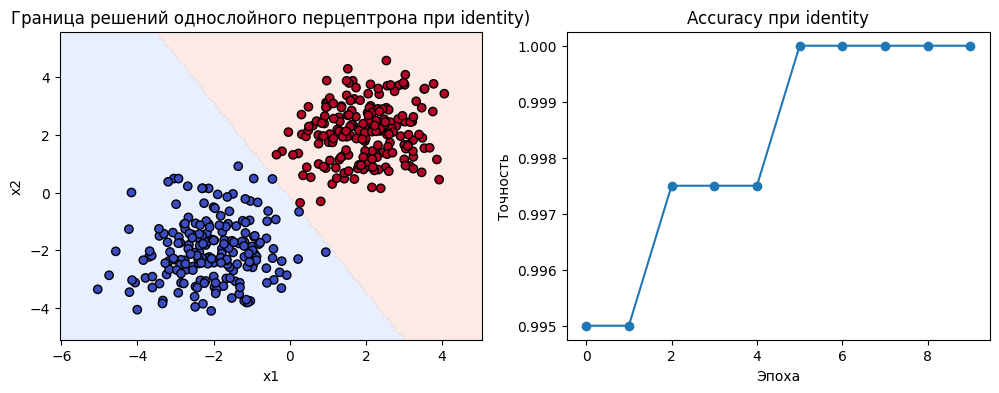

Эпоха 1/10 — точность: 1.0000
Эпоха 2/10 — точность: 1.0000
Эпоха 3/10 — точность: 1.0000
Эпоха 4/10 — точность: 1.0000
Эпоха 5/10 — точность: 1.0000
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


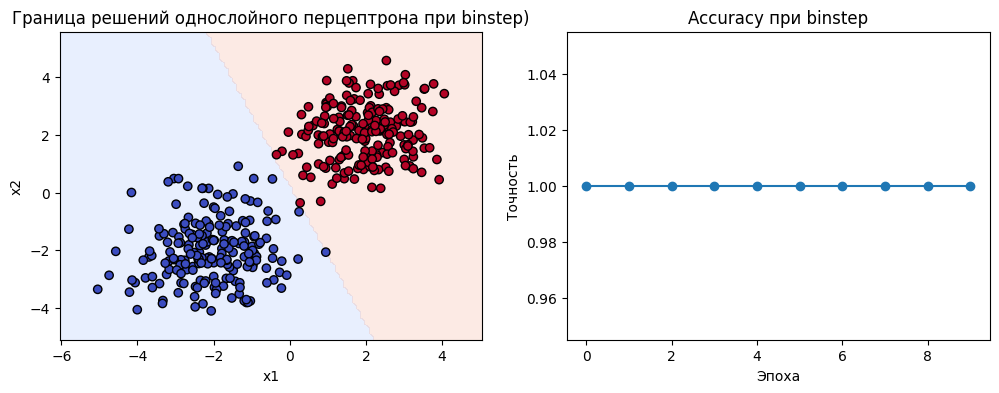

Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9975
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9975
Эпоха 5/10 — точность: 0.9975
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


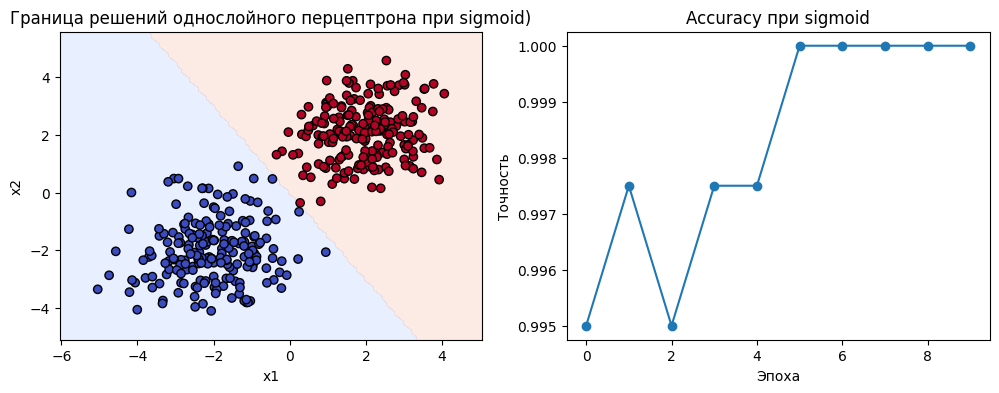

Эпоха 1/10 — точность: 0.9900
Эпоха 2/10 — точность: 0.9900
Эпоха 3/10 — точность: 0.9975
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9975
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9975
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 0.9975
Эпоха 10/10 — точность: 0.9950


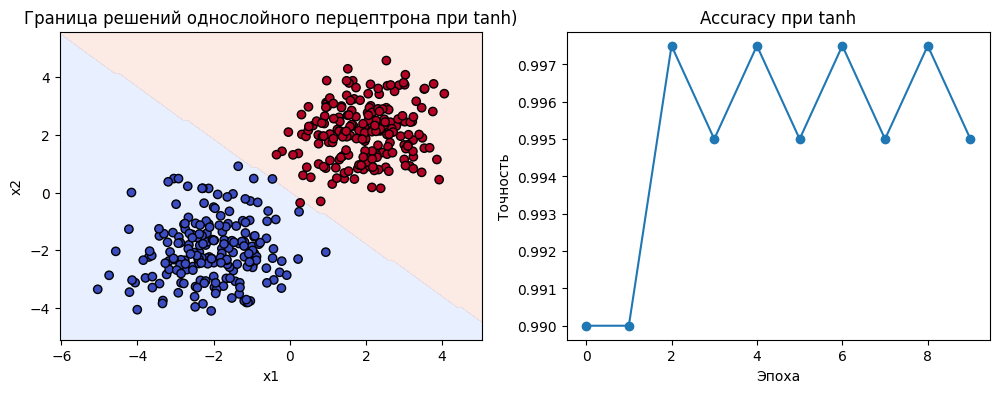

Эпоха 1/10 — точность: 0.9925
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9950
Эпоха 5/10 — точность: 0.9975
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9975
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 0.9975
Эпоха 10/10 — точность: 0.9975


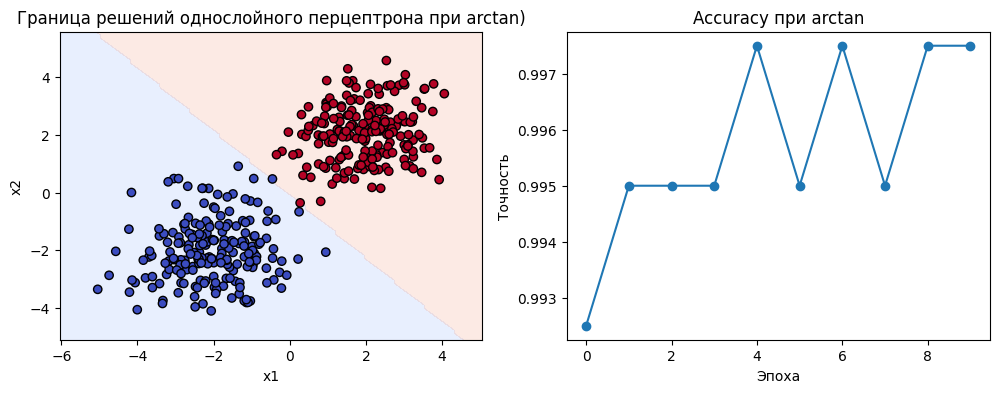

Эпоха 1/10 — точность: 0.9975
Эпоха 2/10 — точность: 0.9975
Эпоха 3/10 — точность: 1.0000
Эпоха 4/10 — точность: 1.0000
Эпоха 5/10 — точность: 1.0000
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


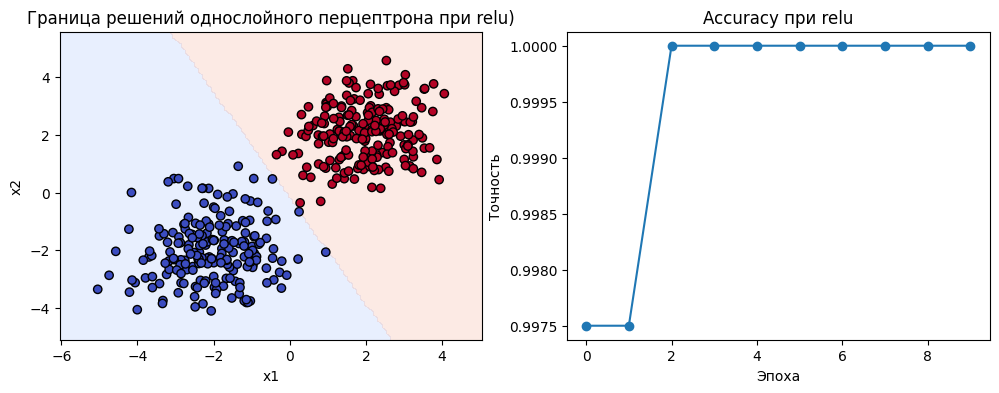

In [161]:
LEARNING_RATE = 0.1
EPOCHS = 10


for func_name in activation_funcs.keys():
    w = np.random.randn(2)
    b = np.random.random()

    w, b, metrics = fit(X, w, b, LEARNING_RATE, EPOCHS, func_name)

    plot_info(w, b, func_name, metrics, EPOCHS)

1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


1. a. Вводит нелинейность, это позволяет замахнуться на более сложные задачи, чем линейное разделение, и ограничивает диапазон выходных значений (условно сигмоида выдает значения от 0 до 1, а не от -беск до +беск)

1. б. Нейрон есть одна вычислительная единица, выполняющая скалярное произведение между входным и весовым векторами + некоторое смещение. Перцептрон однослойный же есть сеть из нейронов

2. Обучаем с помощью градиентного спуска (по сути минимизация многомерной функции)

3. Однослойный перцептрон билдит гиперплоскость для разделения данных, но при этом в ксоре данные не разделимы

4. Выходной диапазон перестает быть ограниченным сверху, обучение ускорется, потому что экспоненту считать все таки дорого, отрицательные нейроны будут дохнуть